
Исследование объявлений о продаже квартир
    
Цель работы — провести исследовательский анализ данных, который поможет установить параметры, влияющие на цену объектов. 
    
План работы:
    
Шаг 1 Открытие файла с данными и изучение общей информации
    
Шаг 2 Предобработка данных
    
Шаг 3 Добавление в таблицу новых метрик
    
Шаг 4 Проведение исследовательского анализа данных
    
Шаг 5 Общий вывод

Описание данных:
В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.     

__Шаг 1. Открытие файла с данными и изучение общей информацию__

In [1]:
import pandas as pd
import warnings

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
display(data.head(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
display(data.info())
started_len = len(data)
print(started_len)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

23699


In [4]:
numeric_columns = data.select_dtypes(include=['number']).columns
print(numeric_columns)

Index(['total_images', 'last_price', 'total_area', 'rooms', 'ceiling_height',
       'floors_total', 'living_area', 'floor', 'kitchen_area', 'balcony',
       'airports_nearest', 'cityCenters_nearest', 'parks_around3000',
       'parks_nearest', 'ponds_around3000', 'ponds_nearest',
       'days_exposition'],
      dtype='object')


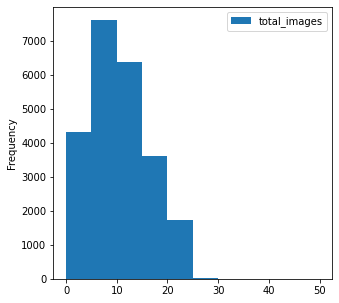

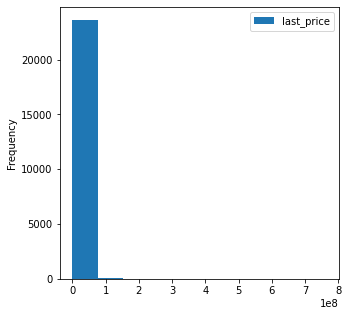

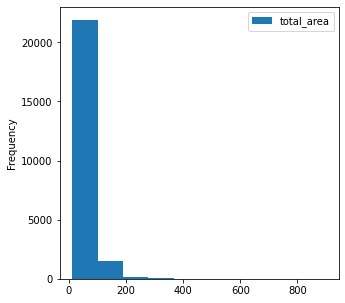

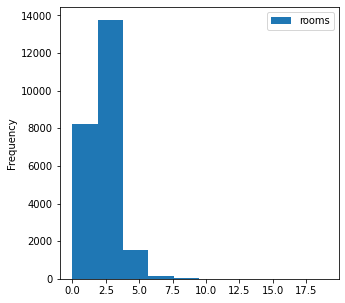

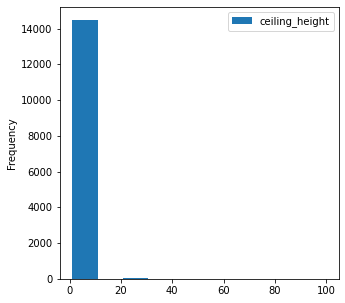

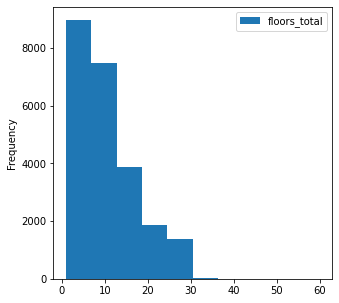

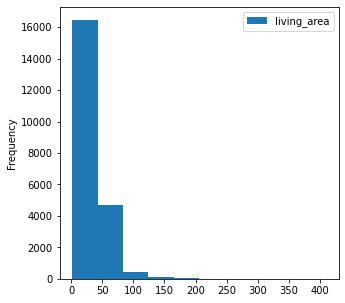

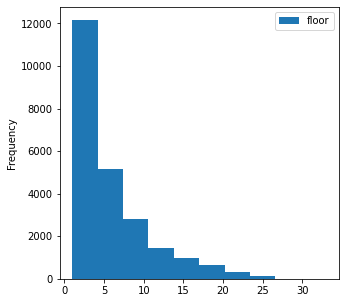

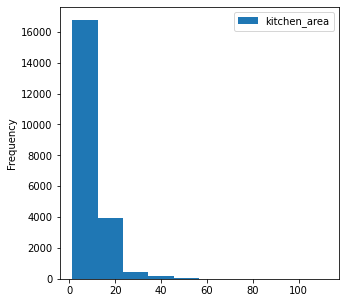

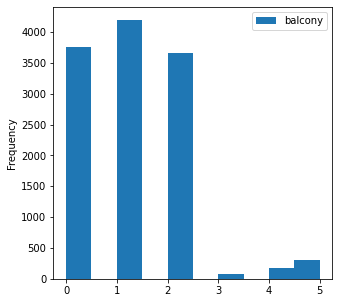

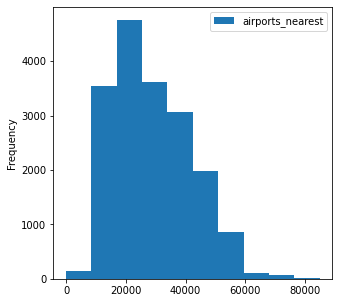

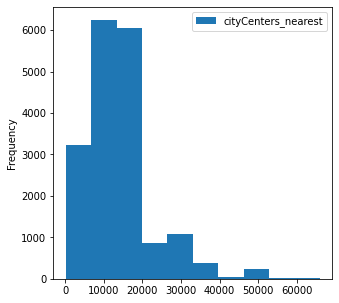

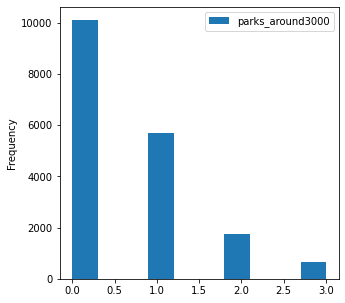

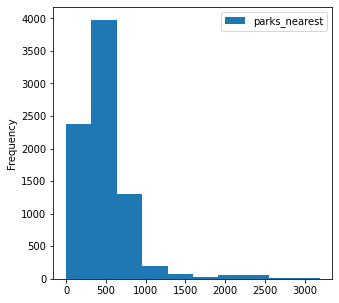

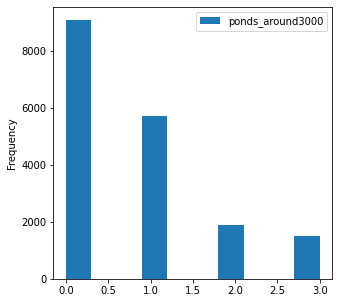

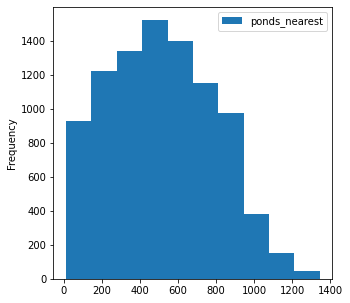

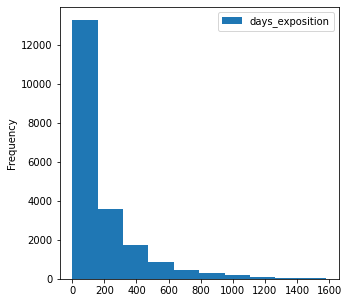

In [5]:
for i in numeric_columns:
    data.plot(y = i, kind = 'hist', figsize = (5, 5))

__Шаг 2. Предобработка данных__

__2.1 Нахождение и изучение пропущенных значений в столбцах__

In [6]:
#Определим в каких столбцах есть пропуски
data.isna().sum().sort_values(ascending = False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

Первым стообцом с пропусками является ceiling_height,владельцы квартир могут не указывать высоту потолков при сдаче квартир в первую очередь из-за того, что высота потолков является незначительным показателем для сдачи квартиры в аренду  

In [7]:
print(data['ceiling_height'].count())
print("Процент пропусков в столбце ceiling_height равен", round(9195/23699*100, 2),'%')

14504
Процент пропусков в столбце ceiling_height равен 38.8 %


In [8]:
missing = pd.DataFrame()
missing['Column_Name'] = data.columns
missing['Missing_Count'] = data.isna().sum().values
missing['Percentage_Missing'] = (missing['Missing_Count'] / len(data)) * 100

print(missing.sort_values('Percentage_Missing', ascending = False))

             Column_Name  Missing_Count  Percentage_Missing
9           is_apartment          20924           88.290645
18         parks_nearest          15620           65.909954
20         ponds_nearest          14589           61.559559
13               balcony          11519           48.605426
5         ceiling_height           9195           38.799105
15      airports_nearest           5542           23.384953
16   cityCenters_nearest           5519           23.287902
19      ponds_around3000           5518           23.283683
17      parks_around3000           5518           23.283683
21       days_exposition           3181           13.422507
12          kitchen_area           2278            9.612220
7            living_area           1903            8.029875
6           floors_total             86            0.362885
14         locality_name             49            0.206760
0           total_images              0            0.000000
1             last_price              0 

Заметим, что 63.4% объявлений не содержат информацию о высоте потолков, так как пропусков слишком много, мы не можем заменить их всех на среднее/медианное значение.

Далее идет стобец floors_total, так как всего 86 объявлений не содеражт информации о этажности дома, мы можем посчиать, что эти пропуски были сделаны либо из-за невнимательности владельцев при заполнении объявления, либо из-за того, что сами владельцы не владеют этой иноформацией, например живут в друом городе.
Процент пропусков совссем небольшой, мы можем заменить пропуски на среднее занчение в столбце.

In [9]:
print("Процент пропусков в столбце floors_total равен", round(86/23699*100, 2),'%')

Процент пропусков в столбце floors_total равен 0.36 %


In [10]:
data = data.dropna(subset=['floors_total'])
print(data['floors_total'].isna().sum())

0


Следующим столбцом с пропусками ялвяется living_area, владельцы могут скрывать инофрмацию о размере квартиры, которую они сдают, по нескольким причинам: 1)Владельцы квартиры могут счиать, что уклонение от указания размера квартиры может предоставить им простарноство для торга. 2)В некоторых случаях владельцы могут использовать стратегию маркетинга, не раскрывая точный размер квартиры, чтобы создать дополнительный интерес со стороны потенциальных арендаторов. Это может быть полезным, если квартира обладает другими уникальными характеристиками, которые могут быть привлекательными. 

In [11]:
print("Процент пропусков в столбце living_area равен", round(1903/23699*100, 2),'%')

Процент пропусков в столбце living_area равен 8.03 %


Так как площадь квартиры является одним из наиболее значимых характеристик квартиры, которые влияют в том числе и на цену объявления, мы не можем заменить пропуски этих данных на какие-либо средние значения этого столбца. 

Следующим столбцом с прорусками является столбец is_apartment, если продавец не указал апартаменты это или нет, то, скорее всего, его недвижимость не является апартаментами. Заменим все пропуски на занчение False 

In [12]:
data['is_apartment'].fillna(False, inplace = True)
print(data['is_apartment'].isna().sum())#Проверили, что все пропуски удалены

0


/opt/conda/lib/python3.9/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


Следующим столбцом с прорусками является kitchen_area, причины скрытия информации о размере кухни могут быть схожи с причинами пропусков в столбце living_area, поэтому аналогично livivng_area мы не будем заменять пропуски на какие-лиюо средние величины 

In [13]:
print("Процент пропусков в столбце kitchen_area равен", round(2278/23699*100, 2),'%')

Процент пропусков в столбце kitchen_area равен 9.61 %


Далее идет столбец balcony, если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Заменим такие проруски на число 0.

In [14]:
print("Процент пропусков в столбце balcony равен", round(11519/23699*100, 2),'%')

Процент пропусков в столбце balcony равен 48.61 %


In [15]:
data['balcony'].fillna(0, inplace = True)
print(data['balcony'].isna().sum())#Проверили, что все пропуски удалены

0


Далее идет столбец с названием locality_name, указание населенного пункта в объявлении может быть ключевым фактором для потенциальных арендоторов при принятии решения, поэтому пропуски в этом столбце, вероятнее всего, возникли из-за каких-либо ошибок со стороны владельцев. Здесь нет смысла изменять пропускм на какие-либо иные значения.

In [16]:
print("Процент пропусков в столбце locality_name равен", round(49/23699*100, 2),'%')

Процент пропусков в столбце locality_name равен 0.21 %


Далее идет информация про ближайший аэропорт, ближайший центр города, парки и водоемы на расстоянии 3000 метров и ближайшие парки и водоемы, во всех этих данных есть пропуски, вероятнее всего они возникают из-за сложности описания, в некоторых случаях владельцы могут не указывать подробности о близлежащей инфраструктуре из-за сложности предоставления точной информации. Например, если есть несколько аэропортов или центров города вблизи, или же их просто нет, указание конкретных данных может быть затруднительным. В этих столбцах некорректно указывать какие-либо данные 

In [17]:
print("Процент пропусков в столбце airports_nearest равен", round(5542/23699*100, 2),'%')
print("Процент пропусков в столбце cityCenters_nearest равен", round(5519/23699*100, 2),'%')
print("Процент пропусков в столбце parks_around3000 равен", round(5518/23699*100, 2),'%')
print("Процент пропусков в столбце parks_nearest равен", round(15620/23699*100, 2),'%')
print("Процент пропусков в столбце ponds_around3000 равен", round(5518/23699*100, 2),'%')
print("Процент пропусков в столбце ponds_nearest равен", round(14589/23699*100, 2),'%')

Процент пропусков в столбце airports_nearest равен 23.38 %
Процент пропусков в столбце cityCenters_nearest равен 23.29 %
Процент пропусков в столбце parks_around3000 равен 23.28 %
Процент пропусков в столбце parks_nearest равен 65.91 %
Процент пропусков в столбце ponds_around3000 равен 23.28 %
Процент пропусков в столбце ponds_nearest равен 61.56 %


Последним столбцом с пропусками ялвяется days_exposition, причина припусков в этой строке, вероятнее всего, кроется в проблеме сервиса, который собирал информацию, ведь владельцы квартир не должны сами заполнять информацию о том, сколько дней это объявление актуально. Соответсвенно мы не можем исправить пропуски в этом столбце

In [18]:
print("Процент пропусков в столбце days_exposition равен", round(3181/23699*100, 2),'%')

Процент пропусков в столбце days_exposition равен 13.42 %


__2.2 Преобразование типов данных в некоторых стобцах__

In [19]:
#выведем информацию о типах данных для каждого столбца
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23613 non-null  int64  
 1   last_price            23613 non-null  float64
 2   total_area            23613 non-null  float64
 3   first_day_exposition  23613 non-null  object 
 4   rooms                 23613 non-null  int64  
 5   ceiling_height        14495 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21743 non-null  float64
 8   floor                 23613 non-null  int64  
 9   is_apartment          23613 non-null  bool   
 10  studio                23613 non-null  bool   
 11  open_plan             23613 non-null  bool   
 12  kitchen_area          21382 non-null  float64
 13  balcony               23613 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

всего  в таблице представлено 4 вида типопа данных(int, float, bool и object), в основном типо данных раставлены правильно, значениям, которым соответствует целое число, присвоен int, значениям с плавующей точков присвоен тип float, качесвтенным показателям - bool. Обратим внимание на тип данных столбца first_day_exposition. 
Этому столбцу соответсвуют строки с датой первого поялвения объявления, присвоен тип object, соответсвующий строке. Для того, чтобы с этими данными можно было совершать арифметичнские операции переведем этот столбец в datetime.

In [20]:
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S'
)
data['floors_total'] =data['floors_total'].astype(int)
data['parks_around3000'] = pd.to_numeric(data['parks_around3000'], errors='coerce', downcast='integer')
data['ponds_around3000'] = pd.to_numeric(data['ponds_around3000'], errors='coerce', downcast='integer')

/tmp/ipykernel_63/563377426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['first_day_exposition'] = pd.to_datetime(
/tmp/ipykernel_63/563377426.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['floors_total'] =data['floors_total'].astype(int)
/tmp/ipykernel_63/563377426.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [21]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  float64       
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        14495 non-null  float64       
 6   floors_total          23613 non-null  int64         
 7   living_area           21743 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          23613 non-null  bool          
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          21382 non-null  float64       
 13  balcony         

In [22]:
print(data['rooms'])

0        3
1        1
2        2
3        3
4        2
        ..
23694    3
23695    3
23696    2
23697    2
23698    1
Name: rooms, Length: 23613, dtype: int64


__2.3 Поиск и удаление неявных дубликатов__

In [23]:
print(data['locality_name'].unique())

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

Заменим все буквы 'ё' в названиях наслеленных пунктов на 'е', а также изменим в названиях 'поселок городского типа' на 'поселок', так мы исключим некоторые неявные дубликаты.

In [24]:
replace_dict = {'ё': 'е', 'поселок городского типа': 'поселок', 'Поселок Городского Типа': 'Поселок'}
data['locality_name'] = (
    data['locality_name'].replace(replace_dict, regex = True)
) 

/tmp/ipykernel_63/4147371662.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['locality_name'] = (


In [25]:
print(data.duplicated().sum())

0



Явных дубликатов нет
 

__Шаг 3 Добавление в таблицу новых столбцов__

Цена одного квадратного метра

In [26]:
data['price_square_meter'] = round(data['last_price'] / data['total_area'], 2)

/tmp/ipykernel_63/4042035410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price_square_meter'] = round(data['last_price'] / data['total_area'], 2)


День недели публикации объявления 

In [27]:
data['weekday_of_publication'] = data['first_day_exposition'].dt.weekday

/tmp/ipykernel_63/2164802325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['weekday_of_publication'] = data['first_day_exposition'].dt.weekday


Месяц публикации объявления

In [28]:
data['month_of_publication'] = data['first_day_exposition'].dt.month

/tmp/ipykernel_63/1966932341.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month_of_publication'] = data['first_day_exposition'].dt.month


Год публикации объявления

In [29]:
data['year_of_publication'] = data['first_day_exposition'].dt.year

/tmp/ipykernel_63/2739622878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year_of_publication'] = data['first_day_exposition'].dt.year


Тип этажа квартиры

In [30]:
data['apartment_floor_type'] = data.apply(
    lambda row: 'последний' if row['floor'] == row['floors_total']
    else 'первый' if row['floor'] == 1
    else 'другой',
    axis=1)

/tmp/ipykernel_63/3422898878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['apartment_floor_type'] = data.apply(


Расстояние до центра города в км

In [31]:
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest'] / 1000, 0)

/tmp/ipykernel_63/3744531076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cityCenters_nearest_km'] = round(data['cityCenters_nearest'] / 1000, 0)


__Шаг 4. Исследовательский анализ данных__

__1.Изучение отедльных параметров объектов и пстроение гистограм__

Каждый раз когда удаляем данные, будем счиать какой процент данных мы удаляем

Общая площадь

In [32]:
#Определим процент квартир, площадь которых больше 300, чтобы понять, что график можно строить с range = (: 300), для того, чтобы график был более наглядным
print(data.query('total_area > 300').count()['total_area']/data['total_area'].count() * 100)

0.25833227459450303


<AxesSubplot:ylabel='Frequency'>

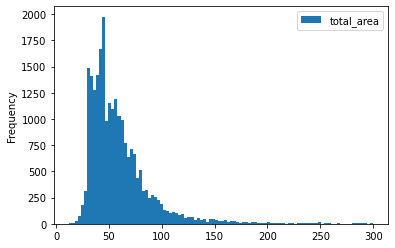

In [33]:
data.plot(y = 'total_area', kind = 'hist', bins = 100, range = (data['total_area'].min(), 300), xlabel = 'Площадь', ylabel = 'Площадь квартир')

In [34]:
data = data[data['total_area'] < 300]

На этой гистограме не видно каких-либо аномалей, данные логичны, можно предположить, что первый локальный максимум - это среднестатистическся однокомнатная квартира, площадь которой 30-40кв м.. Следующий пик в районе 50-60 кв.м., вероянее всего, соответствует стандартным 2-ухкомнатным квартирам, и последний пик в райное 65-75кв.м. соответсвует трехкомнатным квартирам. Также есть значения, которые на первый взгляд кажутся выбросами, например квартиры по 20 кв метров и более 200, но таких значений очень мало, так что, скорее всего, это не ошибки, а реальные квартиры с необычной площадью.

Жилая площадь

In [35]:
print(data.query('living_area > 150').count()['living_area']/data['living_area'].count() * 100)

0.34573364679850643


<AxesSubplot:ylabel='Frequency'>

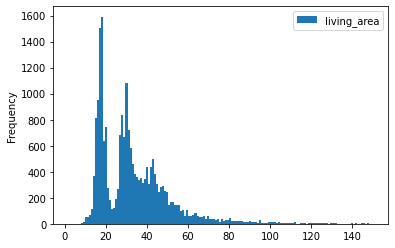

In [36]:
data.plot(y = 'living_area', kind = 'hist', bins = 150, range = (data['living_area'].min(), 150), xlabel = 'Жилая площадь', ylabel = 'Количество квартир')

In [37]:
data = data[(data['living_area'] <= 150) | data['living_area'].isnull()]

Данные выглядт логично за исключением резкого пика в районе 18 кв м и спада в районе 25 кв м, давайте попробуем объяснить это.Резкий пик в районе 18 квадратных метров может быть связан с определенным типом квартир или стандартной планировкой, которая находится в этом диапазоне. Возможно, это популярный вариант для студий, комнат для одного человека или маленьких квартир.Возможно, квартиры с жилой площадью в 25 квадратных метров не так популярны среди потребителей из-за особенностей их планировки или ограниченных функциональных возможностей.

Площадь кухни

In [38]:
print(data.query('kitchen_area > 50').count()['kitchen_area']/data['kitchen_area'].count() * 100)

0.15990969805286426


<AxesSubplot:ylabel='Frequency'>

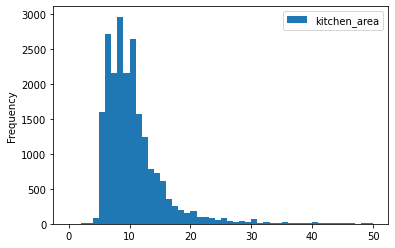

In [39]:
data.plot(y = 'kitchen_area', kind = 'hist', bins = 50, range = (0, 50), xlabel = 'Площадь кухни', ylabel = 'Количество квартир')

In [40]:
data = data[(data['kitchen_area'] <= 50) | data['kitchen_area'].isnull()]

Данные выглядят логично, большинство кухонь находятся в диапозоне от 7 до 12 кв метров, этот диапазон размеров является распространенным и популярным выбором в планировке кухонь, также есть кухни более 20 метров, возможно это совмещенные кухни с гостинной.

Цена квартиры

In [41]:
print(data.query('last_price > 50000000').count()['last_price']/data['last_price'].count() * 100)

0.26875986519346445


<AxesSubplot:ylabel='Frequency'>

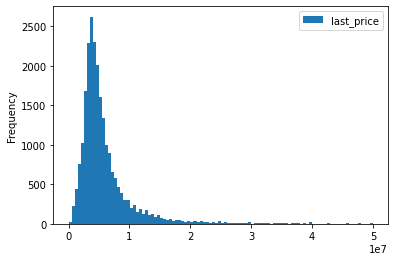

In [42]:
data.plot(y = 'last_price', kind = 'hist', bins = 100, range = (data['last_price'].dropna().min(), 50000000), xlabel = 'Цена квартиры', ylabel = 'Количество квартир')

<AxesSubplot:>

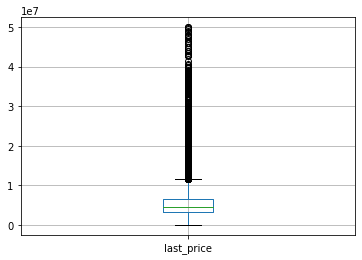

In [43]:
data.query('last_price < 50000000').boxplot('last_price')

In [44]:
data = data[(data['last_price'] <= 50000000) | data['last_price'].isnull()]

На графике цен видно, что основная масса квартир сосредоточена в ценовом диапазоне от 5 до 7 миллионов. Это свидетельствует о наличии стабильного и разнообразного предложения на рынке недвижимости. Несмотря на наличие более дорогих квартир, их относительно небольшое количество не создает значительного искажения распределения цен. Таким образом, данные о ценах выглядят логичными и отражают разнообразие предложения на рынке недвижимости в рассматриваемом сегменте.

Количество комнат

In [45]:
print(data.query('rooms > 5').count()['rooms']/data['rooms'].count() * 100)

0.4405851655402515


<AxesSubplot:xlabel='Количество комнат в квартире', ylabel='Количество квартир'>

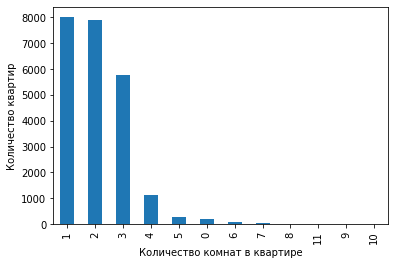

In [46]:
data['rooms'].value_counts().plot(kind='bar', xlabel = 'Количество комнат в квартире', ylabel = 'Количество квартир')

Студия иногда может рассматриваться как квартира с 0 комнат, так как в таких помещениях обычно отсутствует физическое разделение на отдельные комнаты. Зачастую студии и однокомнатные квартиры разделяют в варинтах, здесь этого сделано не было, поэтому, возможно, некотрорые воадельцы студий отнесли их к квартирам с 0 комнат, а некоторые с 1(Если счиать, что студия - это квартира с 0 комнат и ошибки в воде данных нет, то студий подозрительно мало). Изменим все 0 на 1.

/tmp/ipykernel_63/1180768066.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rooms'] = data['rooms'].replace(0, 1)


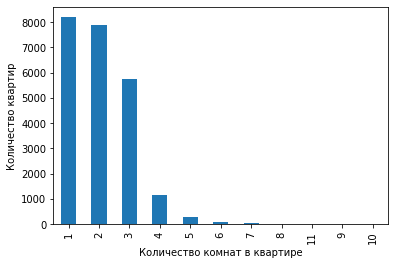

In [47]:
data['rooms'] = data['rooms'].replace(0, 1)
data['rooms'].value_counts().plot(kind='bar', xlabel = 'Количество комнат в квартире', ylabel = 'Количество квартир')
warnings.filterwarnings("ignore")

Теперь на графике наблюдается логичная картина: большинство квартир представлены однокомнатными и студийными вариантами, за ними идут двушки, затем трешки, и, наконец, четырехкомнатные квартиры.

Высота потолков

In [48]:
print(data.query('ceiling_height > 23').count())

total_images              21
last_price                21
total_area                21
first_day_exposition      21
rooms                     21
ceiling_height            21
floors_total              21
living_area               21
floor                     21
is_apartment              21
studio                    21
open_plan                 21
kitchen_area              17
balcony                   21
locality_name             21
airports_nearest          12
cityCenters_nearest       12
parks_around3000          12
parks_nearest              6
ponds_around3000          12
ponds_nearest              7
days_exposition           16
price_square_meter        21
weekday_of_publication    21
month_of_publication      21
year_of_publication       21
apartment_floor_type      21
cityCenters_nearest_km    12
dtype: int64


Заметим, что есть данные превышающие 23 метра, вероятнее всего, владельцы, которые зполняли данные о их квартире допустили ошибку и не поставили '.' в цифре, давайте разделим все значения большие 23 на 10 (Значения от 5 до 23 тоже не очень логичны, но причины их поялвяения не понятны)

In [49]:
data['ceiling_height'] = data['ceiling_height'].apply(lambda x: x / 10 if x > 23 else x)
warnings.filterwarnings("ignore")

<AxesSubplot:ylabel='Frequency'>

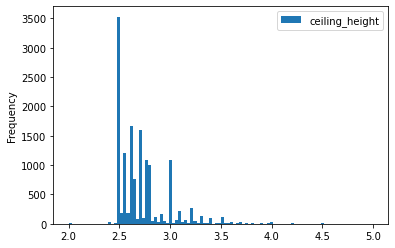

In [50]:
data.plot(y = 'ceiling_height', kind = 'hist', bins = 100, range = (2, 5), xlabel = 'Высота потолков', ylabel = 'Количество квартир')

In [51]:
data = data[(data['ceiling_height'] <= 5) | data['ceiling_height'].isnull()]
print(len(data))

23366


Теперь данные выглядят логично, большинство домов строится с стандартной высотой потолков, на нашем графике это локальные максимумы

Тип квартиры

<AxesSubplot:xlabel='Тип квартиры', ylabel='Количество квартир'>

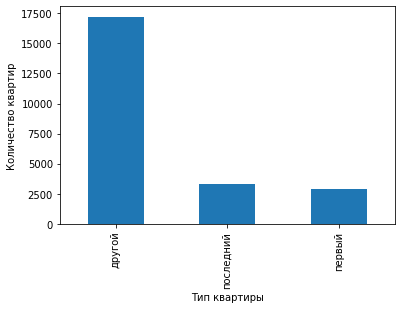

In [52]:
data['apartment_floor_type'].value_counts().plot(kind='bar', xlabel = 'Тип квартиры', ylabel = 'Количество квартир')

Гистограма выглядит логично, 'других' квартир примерно в 7 раз больше чем квартир с первых и последних этажей. Ничего изменять не будем

Общее количество этажей в доме

<AxesSubplot:ylabel='Frequency'>

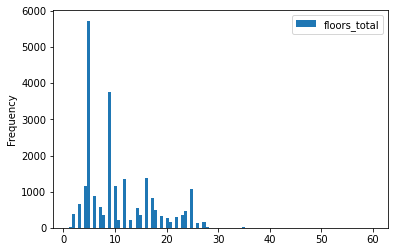

In [53]:
data.plot(y = 'floors_total', kind = 'hist', bins = 100, range = (data['floors_total'].min(), data['floors_total'].max()), xlabel = 'Общее количество этажей в доме', ylabel = 'Количество квартир')

Из графика видно, что в основном здания в нашем наборе данных имеют пять этажей, также значительное количество девятиэтажных домов. Даже значение около 35 может быть объяснено тем, что сейчас существуют здания с таким количеством этажей.

Расстояние до центра

<AxesSubplot:ylabel='Frequency'>

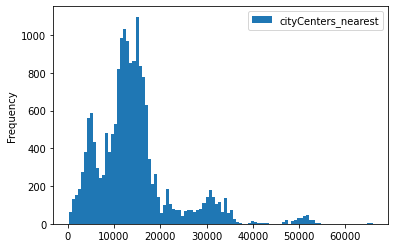

In [54]:
data.plot(y = 'cityCenters_nearest', kind = 'hist', bins = 100, range = (data['cityCenters_nearest'].min(), data['cityCenters_nearest'].max()), xlabel = 'Расстояние до центра города в метрах', ylabel = 'Количество квартир')

Расстояние до центра может быть любым, особенно если мы рассматриваем Россию, где между ближайшими населенными пунктами может быть несколько сотен км

Расстояние до ближайшего парка

<AxesSubplot:ylabel='Frequency'>

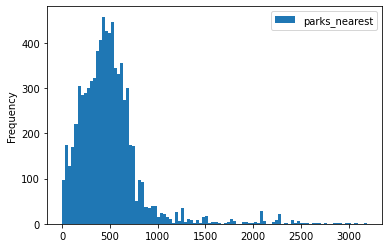

In [55]:
data.plot(y = 'parks_nearest', kind = 'hist', bins = 100, range = (data['parks_nearest'].min(), data['parks_nearest'].max()), xlabel = 'Расстояние до ближайшего парка', ylabel = 'Количество квартир')

Аналогично расстоянию до центра, расстояние до ближайшего парка может быть абсолютно любым

In [56]:
print(len(data)/started_len)

0.9859487742098823


__2 Изучение скорости продажи квартир__

<AxesSubplot:ylabel='Frequency'>

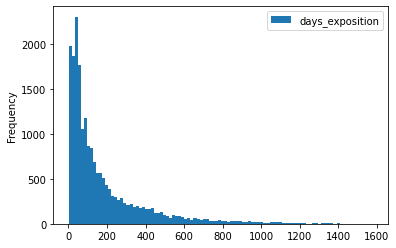

In [57]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, range = (data['days_exposition'].min(), data['days_exposition'].max()), xlabel = 'Сколько дней продавалась квартира', ylabel = 'количество квартир')

<AxesSubplot:>

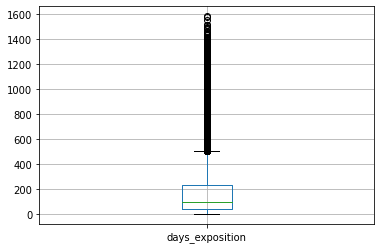

In [58]:
data.boxplot('days_exposition')

In [59]:
print(data['days_exposition'].mean())
print(data['days_exposition'].median())

179.7084362343179
95.0


Среднее значение выборки получилось равным 179, а медианное значение равным 95, оъеденение этих двух метрик может указывать на наличие скошенного распределения времени продажи. Есть множество квартир, которые продаются медленнее, из-за этого среднее знаачение существенно выше медианного

In [60]:
print(data['days_exposition'].describe())

count    20246.000000
mean       179.708436
std        218.659643
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64


Будем считать быстрыми продажами те, которые входят в первые 25% по скорости, медленными те, которые входят в псоледние 25%, то есть быстрые продажи были завершены за 45 дней и менее, медленные более чем за 229 дней

__Какие факторы больше всего влияют на общую (полную) стоимость объекта?__

Зависит ли цена от общей площади ?

<AxesSubplot:xlabel='общая площадь', ylabel='стоимость квартиры'>

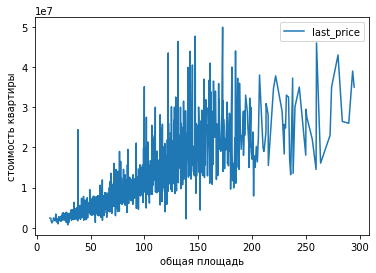

In [61]:
stat_total_area = data.pivot_table(values = 'last_price', index = 'total_area' )
stat_total_area.plot(y = 'last_price', ylabel = 'стоимость квартиры', xlabel = 'общая площадь')

In [62]:
print(data['last_price'].corr(data['total_area']))

0.7726966679737788


Коэффициент корреляции между стоимостью квартиры и её площадью в значении 0,772 указывает на сильную положительную линейную зависимость между этими двумя переменными. В данном случае, площадь квартиры имеет сильное влияние на её стоимость. Это может быть логичным, поскольку обычно большие квартиры стоят дороже.

Зависит ли цена от жилой площади ?

<AxesSubplot:xlabel='жилая площадь', ylabel='стоимость квартиры'>

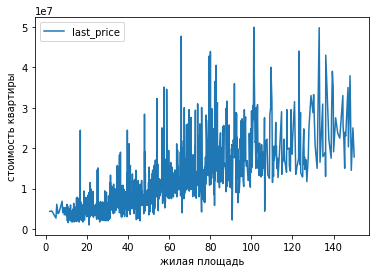

In [63]:
stat_living_area = data.pivot_table(values = 'last_price', index = 'living_area' )
stat_living_area.plot(y = 'last_price', ylabel = 'стоимость квартиры', xlabel = 'жилая площадь')

In [64]:
print(data['last_price'].corr(data['living_area']))

0.6677025229614204


Когда корреляция между ценой и общей площадью (0,78) выше, чем между ценой и жилой площадью (0,67), это может указывать на наличие нежилых пространств в больших квартирах. Большие квартиры могут включать в себя дополнительные помещения, такие как кладовые, коридоры, туалеты или другие нежилые зоны, которые не относятся к жилой площади. Такие пространства могут влиять на общую площадь, но не обязательно на жилую площадь. При этом корелция между ценой и жилой площадью все равно остается большой, что указывает на положительную линейную зависимость 

Зависит ли цена от площади кухни ?

<AxesSubplot:xlabel='площадь кухни', ylabel='стоимость квартиры'>

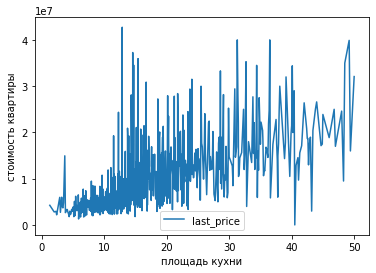

In [65]:
stat_kitchen_area = data.pivot_table(values = 'last_price', index = 'kitchen_area' )
stat_kitchen_area.plot(y = 'last_price', ylabel = 'стоимость квартиры', xlabel = 'площадь кухни')

In [66]:
print(data['last_price'].corr(data['kitchen_area']))

0.5901357021414813


Коэффициент корреляции между стоимостью квартиры и её площадью в значении 0,59 указывает на положительную линейную зависимость между этими двумя переменными. В данном случае, стоимость квартиры влияет на площадь кухни. Это может быть логичным, поскольку обычно чем больше квартиры стоят, тем больше в них делают кухни.

Зависит ли цена от количества комнат в квартире ?

<AxesSubplot:xlabel='количество комнат', ylabel='стоимость квартиры'>

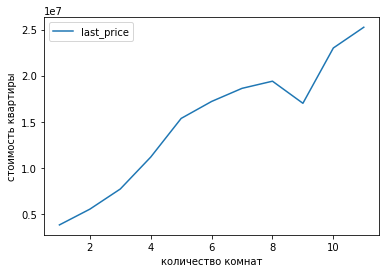

In [67]:
stat_rooms = data.pivot_table(values = 'last_price', index = 'rooms' )
stat_rooms.plot(y = 'last_price', ylabel = 'стоимость квартиры', xlabel = 'количество комнат')

In [68]:
print(data['last_price'].corr(data['rooms']))

0.48361581476587406


Корреляция в 0.48 между количеством комнат и ценой квартиры указывает на умеренную положительную связь между этими двумя переменными. В данном контексте это означает, что, в среднем, более крупные квартиры (с большим количеством комнат) имеют тенденцию быть более дорогими. Однако корреляция в 0.48 не является очень сильной, и многое может зависеть от других факторов.
Это также означает, что изменение в количестве комнат может объяснить лишь часть изменений в цене квартиры, и другие факторы, возможно, также влияют на цену. 

Зависит ли цена от того, на каком этаже находится квартира ?

<AxesSubplot:xlabel='тип этажа', ylabel='стоимость квартиры'>

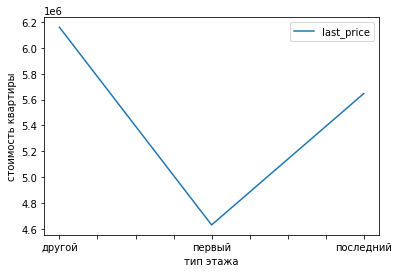

In [69]:
stat_floor_type = data.pivot_table(values = 'last_price', index = 'apartment_floor_type' )
stat_floor_type.plot(y = 'last_price', ylabel = 'стоимость квартиры', xlabel = 'тип этажа')

Так как параметр apartment_floor_type ялвяется не количественным, а качественным, воспользуемся корреляцией Крамера.Коэффициент корреляции Крамера — это статистическая мера, используемая для определения силы связи между категориальными переменными.Коэффициент корреляции Крамера формула основана на базе Пирсоновского коэффициента корреляции и является его улучшенным вариантом для использования с категориальными переменными.

In [70]:
from scipy.stats import chi2_contingency
import numpy as np

contingency_table = pd.crosstab(data['last_price'], data['apartment_floor_type'])
chi2, _, _, _ = chi2_contingency(contingency_table)
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1
correlation = np.sqrt(chi2 / (n * min_dim))
print(f"Кореляция равна: {correlation}")

Кореляция равна: 0.3494401147216233


В данном случае, положительная корреляция может указывать на то, что, например, квартиры на более высоких этажах имеют, в среднем, более высокие цены, а квартиры на первом этаже или последнем этаже - более низкие цены. Однако это не означает, что этаж напрямую влияет на цену. Влияние может быть связано с другими факторами, например, видом из окна, шумом и т. д.

Зависит ли цена от дня недели, месяца и года размещения квартиры ?

Корреляция между ценой и днем недели: -0.01699099811083886
Корреляция между ценой и месяцем: 0.0021218452926673364
Корреляция между ценой и годом: -0.044066029545959964


<AxesSubplot:xlabel='год размещениея объявления', ylabel='стоимость квартиры'>

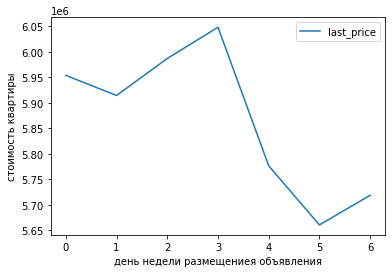

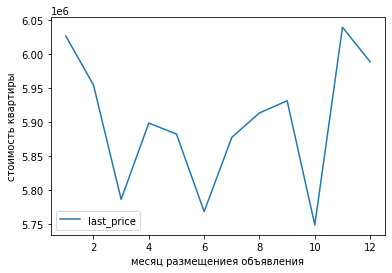

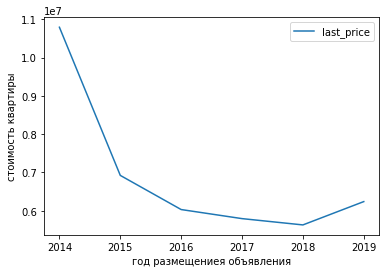

In [71]:
data['day_of_week'] = data['first_day_exposition'].dt.dayofweek
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

correlation_day_of_week = data['last_price'].corr(data['day_of_week'])
correlation_month = data['last_price'].corr(data['month'])
correlation_year = data['last_price'].corr(data['year'])

print("Корреляция между ценой и днем недели:", correlation_day_of_week)
stat_day_of_week = data.pivot_table(values = 'last_price', index = 'day_of_week')
stat_day_of_week.plot(y = 'last_price', ylabel = 'стоимость квартиры', xlabel = 'день недели размещениея объявления')
print("Корреляция между ценой и месяцем:", correlation_month)
stat_month = data.pivot_table(values = 'last_price', index = 'month')
stat_month.plot(y = 'last_price', ylabel = 'стоимость квартиры', xlabel = 'месяц размещениея объявления')
print("Корреляция между ценой и годом:", correlation_year)
stat_year = data.pivot_table(values = 'last_price', index = 'year')
stat_year.plot(y = 'last_price', ylabel = 'стоимость квартиры', xlabel = 'год размещениея объявления')

На основе представленных данных линейная зависимость между ценой квартиры и днем недели, месяцем или годом выставления объявления отсутствует или является слабой.

__Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений — построим сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.__

Найдем 10 населенных пунктов с наибольшим числом объявлений

In [72]:
top_localities = data['locality_name'].value_counts().head(10).index
print(top_localities)

Index(['Санкт-Петербург', 'поселок Мурино', 'поселок Шушары', 'Всеволожск',
       'Пушкин', 'Колпино', 'поселок Парголово', 'Гатчина', 'деревня Кудрово',
       'Выборг'],
      dtype='object')


Создадим сводную таюлицу, где в стобцах average_price и average_area будут средняя цена и площадь для каждого населенного пункта

In [73]:
summary_table = pd.pivot_table(data[data['locality_name'].isin(top_localities)], 
                                index='locality_name',
                                values=['last_price', 'total_area'],
                                aggfunc={'last_price': 'mean', 'total_area': 'mean'})
summary_table.columns = ['average_price', 'average_area']
display(summary_table)

,average_price,average_area
locality_name,,
Всеволожск,3.789068e+06,56.022186
Выборг,3.250983e+06,56.150042
Гатчина,3.488337e+06,50.942932
Колпино,3.866289e+06,52.358279
Пушкин,6.217539e+06,59.329066
Санкт-Петербург,7.124517e+06,61.891395
деревня Кудрово,4.234158e+06,46.571739
поселок Мурино,3.654697e+06,44.008261
поселок Парголово,4.488075e+06,51.521407


Добавим столбцы с количесвтом объявлений и стредней стоимостью квадратного метра

In [74]:
summary_table['number_of_ads'] = data[data['locality_name'].isin(top_localities)]['locality_name'].value_counts()
summary_table['average_price_per_sqm'] = summary_table['average_price'] / summary_table['average_area']
display(summary_table)

,average_price,average_area,number_of_ads,average_price_per_sqm
locality_name,,,,
Всеволожск,3.789068e+06,56.022186,398,67635.128626
Выборг,3.250983e+06,56.150042,237,57898.142109
Гатчина,3.488337e+06,50.942932,307,68475.381534
Колпино,3.866289e+06,52.358279,337,73842.926901
Пушкин,6.217539e+06,59.329066,364,104797.523590
Санкт-Петербург,7.124517e+06,61.891395,15414,115113.210569
деревня Кудрово,4.234158e+06,46.571739,299,90916.895213
поселок Мурино,3.654697e+06,44.008261,552,83045.711526
поселок Парголово,4.488075e+06,51.521407,327,87110.874551


Найдем населённые пункты с самой высокой и низкой стоимостью квадратного метра

In [75]:
highest_price_locality = summary_table['average_price_per_sqm'].idxmax()
lowest_price_locality = summary_table['average_price_per_sqm'].idxmin()
print(highest_price_locality)
print(lowest_price_locality)

Санкт-Петербург
Выборг


 __Теперь выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим их среднюю стоимость на разном удалении от центра. Будем учитывать каждый километр расстояния: узнаем среднюю цену квартир в одном километре от центра, в двух и так далее. Опишем, как стоимость объектов зависит от расстояния до центра города — построим график изменения средней цены для каждого километра от центра Петербурга.__

Создадим столбец расстояния до центра и выберем квартир только в Санкт-Петербурге

In [76]:
data['distance_to_center_km'] = round(data['cityCenters_nearest'] / 1000)
spb_data = data.loc[data['locality_name'] == 'Санкт-Петербург']
display(spb_data.head(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,price_square_meter,weekday_of_publication,month_of_publication,year_of_publication,apartment_floor_type,cityCenters_nearest_km,day_of_week,month,year,distance_to_center_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,120370.37,3,3,2019,другой,16.0,3,3,2019,16.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,92785.71,3,8,2015,другой,14.0,3,8,2015,14.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,100000.00,1,6,2018,другой,8.0,1,6,2018,8.0
7,5,7915000.0,71.6,2019-04-18,2,NaN,24,NaN,22,False,...,110544.69,3,4,2019,другой,12.0,3,4,2019,12.0
9,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,False,...,88524.59,6,2,2017,другой,15.0,6,2,2017,15.0


Группируем данные по расстоянию от центра и вычисляем среднюю цену для каждой группы

In [77]:
average_price_by_distance = spb_data.groupby('distance_to_center_km')['last_price'].mean()
display(average_price_by_distance)

distance_to_center_km
0.0     2.003553e+07
1.0     1.244175e+07
2.0     1.186668e+07
3.0     1.008382e+07
4.0     1.090960e+07
5.0     1.137725e+07
6.0     1.154527e+07
7.0     1.131891e+07
8.0     9.003871e+06
9.0     6.909052e+06
10.0    6.411851e+06
11.0    6.115468e+06
12.0    5.823008e+06
13.0    6.051250e+06
14.0    5.577414e+06
15.0    5.793181e+06
16.0    5.373131e+06
17.0    5.222945e+06
18.0    4.999375e+06
19.0    5.051410e+06
20.0    5.951465e+06
21.0    5.493469e+06
22.0    5.415524e+06
23.0    4.689843e+06
24.0    3.854430e+06
25.0    4.052840e+06
26.0    4.014287e+06
27.0    8.300000e+06
28.0    5.026429e+06
29.0    4.236667e+06
Name: last_price, dtype: float64

<AxesSubplot:xlabel='расстояние до центра', ylabel='средняя стоимость квартир'>

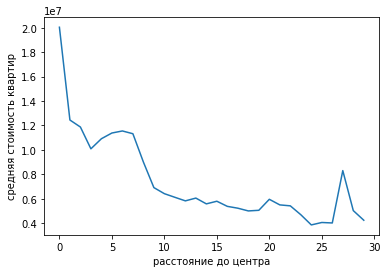

In [78]:
average_price_by_distance.plot(xlabel = 'расстояние до центра', ylabel = 'средняя стоимость квартир')

In [79]:
print(data['distance_to_center_km'].corr(data['last_price']))

-0.33390476932060753


По графику и кореляции видно, что взаимосвязь отрицательная, что логично, чем дальше квартира от центра, тем она дешевле, но непонятен скачок цены в районе 27-28 км, возможно он вызван тем, что на этом расстоянии от города находится какой-то поселок с элитным жильем, либо же это выброс, который мы не отсеяли 

__Шаг 5 Общий вывод__

Исследование взаимосвязи факторов, влияющих на стоимость квартиры, позволило выявить несколько ключевых закономерностей. Мы рассмотрели различные аспекты, такие как общая площадь, количество комнат, удаленность от центра, этажность, а также другие факторы.
Одним из наиболее значимых параметров, влияющих на цену квартиры, является её общая площадь. Мы обнаружили сильную положительную корреляцию между общей площадью и стоимостью квартиры. Это можно объяснить тем, что большая площадь часто ассоциируется с более комфортным пространством, что может повысить ценность недвижимости.
Также стоит отметить, что другие факторы, такие как количество комнат, влияют на цену, но их влияние может быть менее значительным по сравнению с общей площадью. Тем не менее, они остаются важными для потенциальных покупателей.
Некоторые факторы, такие как площадь кухни, могут оказывать меньшее влияние на цену квартиры. Это может объясняться тем, что покупатели чаще всего оценивают общую площадь и количество комнат как более существенные критерии.
Исходя из наших результатов, можно заключить, что цена квартиры тесно связана с её основными параметрами, но также подвержена воздействию ряда других факторов. 